In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from skelm import ELMClassifier

In [3]:
df=pd.read_csv('Group_6_data_cleaned.csv')
df.head()

,Unnamed: 0,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,0,1,-1,1,-1,-1,1,1,1,0,0
1,1,-1,-1,-1,-1,-1,0,1,1,1,1
2,2,1,-1,0,0,-1,0,-1,1,0,1
3,3,1,0,1,-1,-1,0,1,1,0,0
4,4,-1,-1,1,-1,0,0,-1,1,0,1


In [4]:
X = df.drop(["Result"], axis = 1)

y = df["Result"]

# Oversampling and transform the dataset
import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X,y= oversample.fit_resample(X, y)



In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Oversampling and transform the dataset
import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train,y_train= oversample.fit_resample(X_train, y_train)

In [7]:
# Define the four classifiers with best parameters
clf1 = SGDClassifier(penalty='l2',n_jobs=1,loss='log',alpha=0.1)
clf2 = KNeighborsClassifier(n_neighbors= 6, p= 1, weights= 'distance')
clf3 = RandomForestClassifier(n_estimators = 20, 
                               max_features = "sqrt", 
                               max_depth = 90,
                               oob_score = True)
clf4 = SVC(kernel="linear", C = 1, gamma =1)
clf5 = MLPClassifier(activation='logistic', alpha=0.01, hidden_layer_sizes=(200,),
              learning_rate='adaptive')
clf6 = ELMClassifier(alpha=0.001, n_neurons=1000)

In [9]:
# Create an ensemble model using voting
ensemble_model = VotingClassifier(estimators=[('sgd', clf1), ('knn', clf2), ('rf', clf3),('svc', clf4),('MLP', clf5),('ELM',clf6)], voting='hard')

In [10]:
# Train the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('sgd',
                              SGDClassifier(alpha=0.1, loss='log', n_jobs=1)),
                             ('knn',
                              KNeighborsClassifier(n_neighbors=6, p=1,
                                                   weights='distance')),
                             ('rf',
                              RandomForestClassifier(max_depth=90,
                                                     max_features='sqrt',
                                                     n_estimators=20,
                                                     oob_score=True)),
                             ('svc', SVC(C=1, gamma=1, kernel='linear')),
                             ('MLP',
                              MLPClassifier(activation='logistic', alpha=0.01,
                                            hidden_layer_sizes=(200,),
                                            learning_rate='adaptive')),
                             ('ELM',
               

In [11]:
y_pred = ensemble_model.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of athe ensemble model: {:.2f}%'.format(accuracy*100))

Accuracy of athe ensemble model: 84.60%


In [15]:
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[118  16   4]
 [  2 124  15]
 [ 15  13 115]]


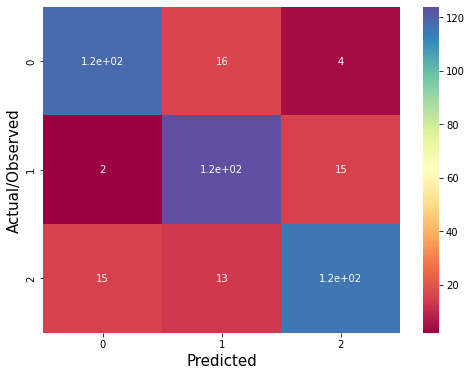

In [16]:
plt.figure(figsize = (8,6))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.87      0.86      0.86       138
           0       0.81      0.88      0.84       141
           1       0.86      0.80      0.83       143

    accuracy                           0.85       422
   macro avg       0.85      0.85      0.85       422
weighted avg       0.85      0.85      0.85       422

